**- Import Libraries**

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from imblearn.over_sampling import SMOTE
import warnings
warnings.filterwarnings('ignore')

**- Import dataset**

In [4]:
df = pd.read_csv('/content/drive/MyDrive/Datasets/Bank Customer Churn Prediction.csv')


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


In [4]:
df.describe()

,customer_id,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [6]:
df.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


- Treat missing and Duplicate Data

In [7]:
print(df.isnull().sum())

customer_id         0
credit_score        0
country             0
gender              0
age                 0
tenure              0
balance             0
products_number     0
credit_card         0
active_member       0
estimated_salary    0
churn               0
dtype: int64


In [8]:
df = df.drop('customer_id', axis=1)

**- Exploratory Data Analysis (EDA)**

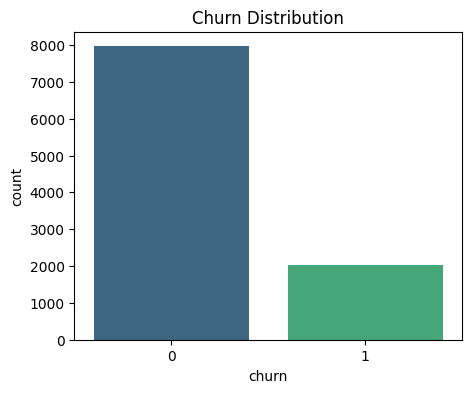

In [9]:
# Target variable distribution
plt.figure(figsize=(5,4))
sns.countplot(x='churn', data=df, palette='viridis')
plt.title('Churn Distribution')
plt.show()

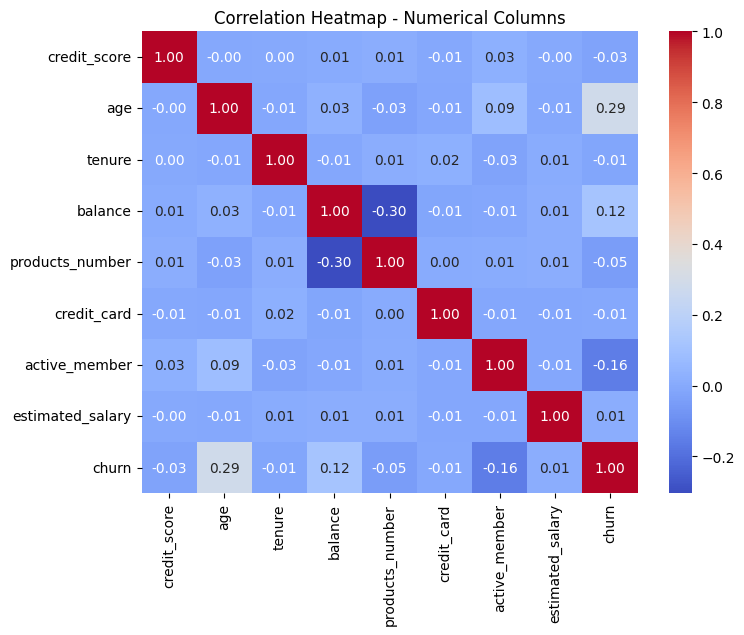

In [11]:
# Correlation Heatmap for Numerical Features

num_cols = ['credit_score', 'age', 'tenure', 'balance', 'products_number',
            'credit_card', 'active_member', 'estimated_salary', 'churn']

plt.figure(figsize=(8,6))
sns.heatmap(df[num_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap - Numerical Columns')
plt.show()

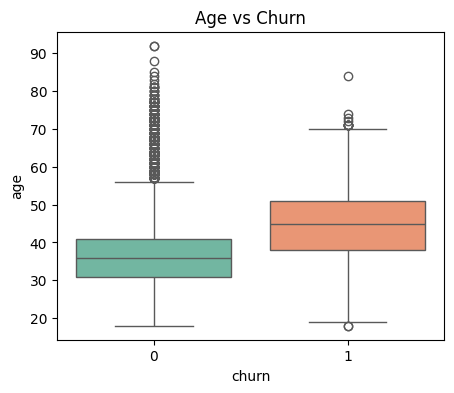

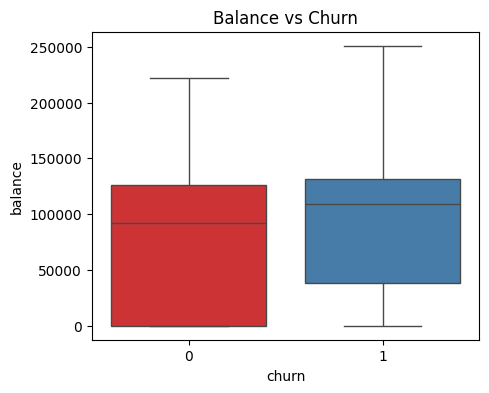

In [13]:
# Boxplots to see distribution vs churn
plt.figure(figsize=(5,4))
sns.boxplot(x='churn', y='age', data=df, palette='Set2')
plt.title('Age vs Churn')
plt.show()

plt.figure(figsize=(5,4))
sns.boxplot(x='churn', y='balance', data=df, palette='Set1')
plt.title('Balance vs Churn')
plt.show()

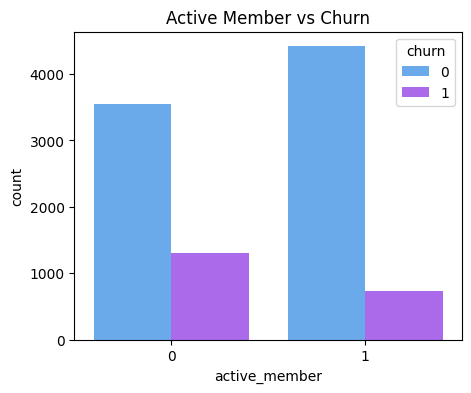

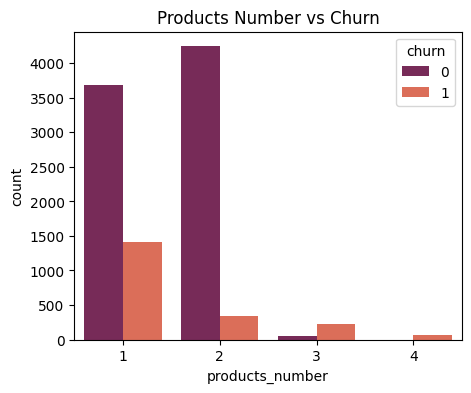

In [15]:
# Countplots for categorical features vs churn
plt.figure(figsize=(5,4))
sns.countplot(x='active_member', hue='churn', data=df, palette='cool')
plt.title('Active Member vs Churn')
plt.show()

plt.figure(figsize=(5,4))
sns.countplot(x='products_number', hue='churn', data=df, palette='rocket')
plt.title('Products Number vs Churn')
plt.show()

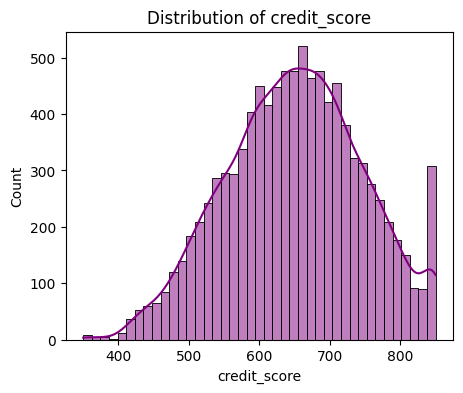

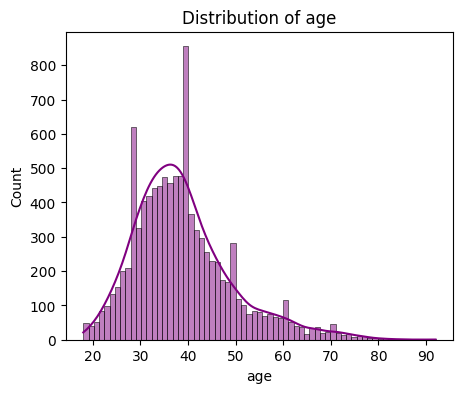

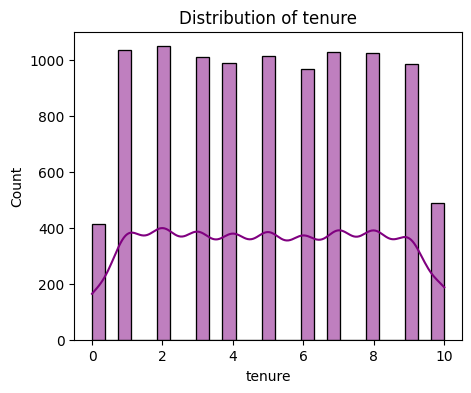

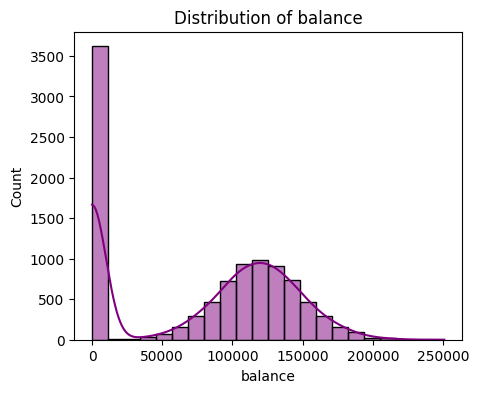

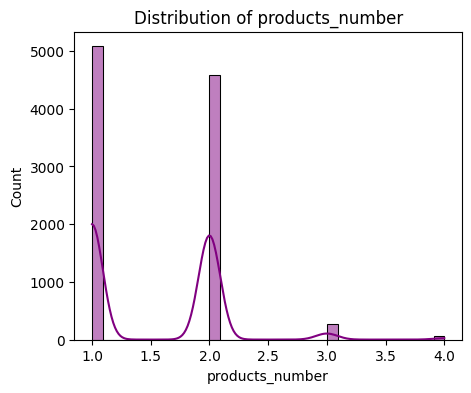

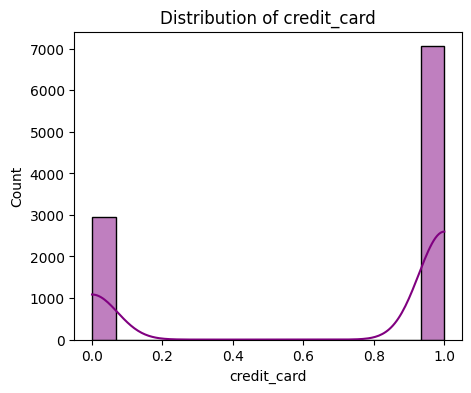

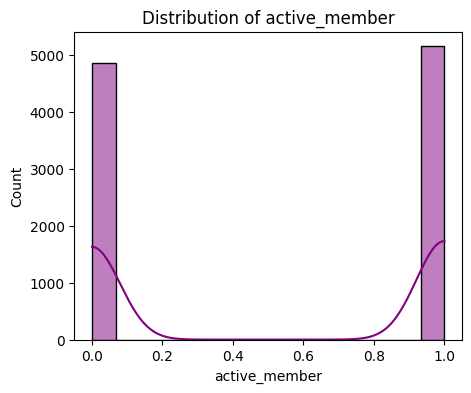

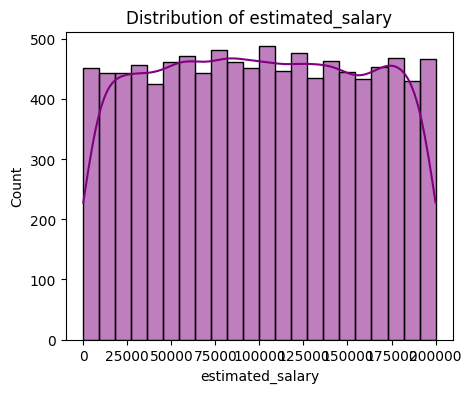

In [29]:
# Histograms for numerical features
for col in num_cols[:-1]:  # Exclude target 'churn'
    plt.figure(figsize=(5,4))
    sns.histplot(df[col], kde=True, color='purple')
    plt.title(f'Distribution of {col}')
    plt.show()

**- Data Preprocessing**

In [17]:
# Define features and target
X = df.drop('churn', axis=1)
y = df['churn']

In [20]:
# Scale features for KNN

cat_cols = X.select_dtypes(include=['object']).columns
print("Categorical columns:", cat_cols)

Categorical columns: Index(['country', 'gender'], dtype='object')


In [21]:
X = pd.get_dummies(X, columns=cat_cols, drop_first=True)

In [22]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   credit_score      10000 non-null  int64  
 1   country           10000 non-null  object 
 2   gender            10000 non-null  object 
 3   age               10000 non-null  int64  
 4   tenure            10000 non-null  int64  
 5   balance           10000 non-null  float64
 6   products_number   10000 non-null  int64  
 7   credit_card       10000 non-null  int64  
 8   active_member     10000 non-null  int64  
 9   estimated_salary  10000 non-null  float64
 10  churn             10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [24]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

print("\n✅ Data successfully split into train and test sets.")
print("Training set size:", X_train.shape)
print("Test set size:", X_test.shape)


✅ Data successfully split into train and test sets.
Training set size: (8000, 11)
Test set size: (2000, 11)


**- K-Nearest Neighbors (KNN) Model**

In [25]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Predictions
y_pred_knn = knn.predict(X_test)

In [26]:
# Evaluation
print("\KNN Model Evaluation:")
print("Accuracy:", round(accuracy_score(y_test, y_pred_knn), 4))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_knn))
print("Classification Report:\n", classification_report(y_test, y_pred_knn))


\KNN Model Evaluation:
Accuracy: 0.8235
Confusion Matrix:
 [[1508   85]
 [ 268  139]]
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.95      0.90      1593
           1       0.62      0.34      0.44       407

    accuracy                           0.82      2000
   macro avg       0.73      0.64      0.67      2000
weighted avg       0.80      0.82      0.80      2000



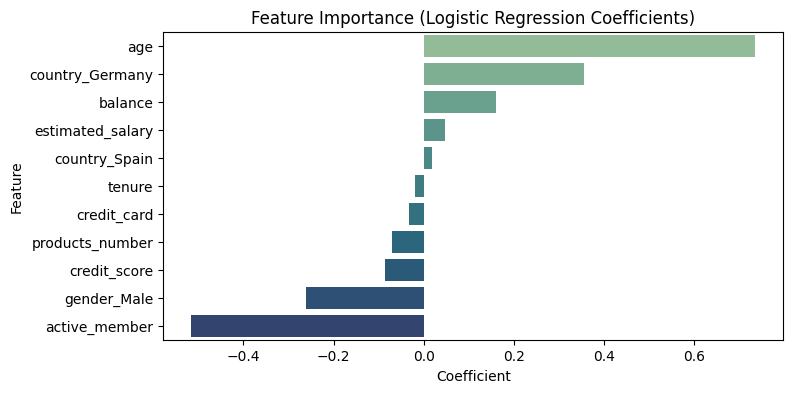

In [27]:
# Logistic regression provides feature coefficients for interpretation
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

importance = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': logreg.coef_[0]
}).sort_values(by='Coefficient', ascending=False)

plt.figure(figsize=(8,4))
sns.barplot(x='Coefficient', y='Feature', data=importance, palette='crest')
plt.title('Feature Importance (Logistic Regression Coefficients)')
plt.show()

🔹 Metrics Breakdown

Accuracy: 0.8235

Overall, the model predicts correctly 82.35% of the time.

Accuracy looks decent, but it can be misleading if the dataset is imbalanced (which seems likely here: 1593 non-churn vs 407 churn).

Confusion Matrix:

[[1508   85]
 [ 268  139]]


True Negatives (TN): 1508 → correctly predicted non-churn

False Positives (FP): 85 → predicted churn but actually non-churn

False Negatives (FN): 268 → predicted non-churn but actually churn → critical, as these are customers who are at risk but missed

True Positives (TP): 139 → correctly predicted churn

✅ Observation: Many churn cases are being missed (FN=268), which explains why recall for class 1 is low.

Classification Report:

Class	Precision	Recall	F1-score
0 (No churn)	0.85	0.95	0.90
1 (Churn)	0.62	0.34	0.44

Precision for churn (1): 0.62 → When the model predicts churn, it’s correct 62% of the time.

Recall for churn (1): 0.34 → Only 34% of actual churn cases are detected.

F1-score for churn: 0.44 → Harmonic mean of precision & recall → low, model struggles on minority class.

Macro avg: 0.73 → averages both classes equally

Weighted avg: 0.80 → averages weighted by support

🔹 Key Insights

The model performs well on non-churn customers but poorly on churn customers.

This is common in imbalanced datasets, where the model favors the majority class.

Conlusion - Your model is decent overall (82% accuracy), but recall for churn is too low. Focus on imbalanced data handling + hyperparameter tuning + alternative models to better detect churn.

**- KNN code with SMOTE and hyperparameter tuning**

In [32]:
# Handle Class Imbalance with SMOTE
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

print("Before SMOTE:", y_train.value_counts())
print("After SMOTE:", y_train_res.value_counts())

Before SMOTE: churn
0    6370
1    1630
Name: count, dtype: int64
After SMOTE: churn
1    6370
0    6370
Name: count, dtype: int64


**- Scale Features**

In [33]:
scaler = StandardScaler()
X_train_res_scaled = scaler.fit_transform(X_train_res)
X_test_scaled = scaler.transform(X_test)

**- Hyperparameter Tuning with GridSearchCV**

In [36]:
param_grid = {
    'n_neighbors': [3,5,7,9,11],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

knn = KNeighborsClassifier()
grid = GridSearchCV(knn, param_grid, cv=5, scoring='f1', n_jobs=-1)
grid.fit(X_train_res_scaled, y_train_res)

print("Best Parameters:", grid.best_params_)

Best Parameters: {'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'distance'}


**- Train Final KNN with Best Parameters**

In [37]:
knn_best = grid.best_estimator_
y_pred = knn_best.predict(X_test_scaled)

**- Evaluation**

In [38]:
print("\n🎯 KNN Model Evaluation After SMOTE + Tuning:")
print("Accuracy:", round(accuracy_score(y_test, y_pred),4))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


🎯 KNN Model Evaluation After SMOTE + Tuning:
Accuracy: 0.7435
Confusion Matrix:
 [[1247  346]
 [ 167  240]]
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.78      0.83      1593
           1       0.41      0.59      0.48       407

    accuracy                           0.74      2000
   macro avg       0.65      0.69      0.66      2000
weighted avg       0.79      0.74      0.76      2000



**- Plot Confusion Matrix**

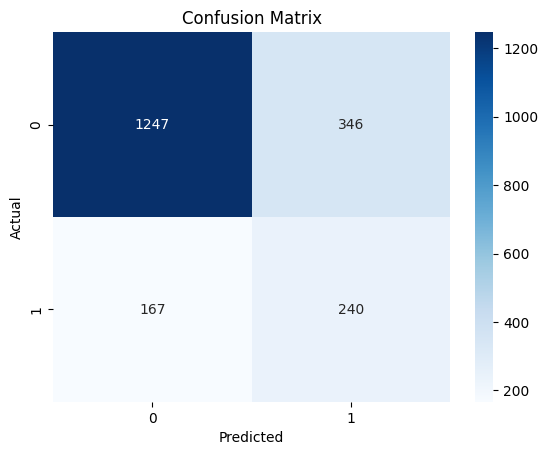

In [39]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

Metrics Breakdown

Accuracy: 0.7435

Overall accuracy dropped from ~82% → 74%.

This is expected because we balanced the classes; the model now predicts more churn cases correctly, which reduces “easy” correct predictions for the majority class (non-churn).

Confusion Matrix:

[[1247  346]   # Non-churn
 [ 167  240]]   # Churn


True Negatives (TN): 1247 → correctly predicted non-churn

False Positives (FP): 346 → predicted churn but actually non-churn

False Negatives (FN): 167 → predicted non-churn but actually churn

True Positives (TP): 240 → correctly predicted churn

✅ Observation: Much better detection of churn customers (TP increased from 139 → 240).

Classification Report:

Class	Precision	Recall	F1-score
0 (No churn)	0.88	0.78	0.83
1 (Churn)	0.41	0.59	0.48

Churn Recall improved: from 0.34 → 0.59 → we are now catching 59% of actual churners.

Precision for churn dropped: 0.62 → 0.41 → more false positives (non-churn predicted as churn).

F1-score for churn improved slightly: 0.44 → 0.48.

🔹 Key Insights

Trade-off: Balancing the dataset with SMOTE reduces overall accuracy but significantly improves recall for the minority class (churn).

Business perspective: It’s often better to catch more churners even if we predict a few non-churners incorrectly — you can target retention campaigns more effectively.

Model still struggles on precision: Many non-churners are predicted as churn (FP=346).

Conclusion:

SMOTE + hyperparameter tuning worked: Recall for churn improved from 0.34 → 0.59, capturing more at-risk customers.

Overall accuracy dropped slightly, which is normal in imbalanced class handling.